In [16]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

# Optional: make plots look nicer
sns.set(style='whitegrid')


In [17]:

apps = pd.read_csv(r"C:\Users\ASUS\Downloads\archive (1)\datasets\apps.csv")
reviews = pd.read_csv(r"C:\Users\ASUS\Downloads\archive (1)\datasets\user_reviews.csv")
print("Data is Loaded")

Data is Loaded


In [18]:
apps.info()
apps.head()
reviews.info()
reviews.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [19]:
# 1️ Convert all values to strings
apps['Price'] = apps['Price'].astype(str)

# 2️ Remove $ and any spaces
apps['Price'] = apps['Price'].str.replace('$', '', regex=False).str.strip()

# 3️ Replace 'Free' or empty strings with 0
apps['Price'] = apps['Price'].replace({'Free':'0', '': '0'})

# 4️ Convert cleaned column to float
apps['Price'] = apps['Price'].astype(float)

# 5️ Check the first few rows
apps[['App', 'Price']].head(10)


,App,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0
1,Coloring book moana,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0
3,Sketch - Draw & Paint,0.0
4,Pixel Draw - Number Art Coloring Book,0.0
5,Paper flowers instructions,0.0
6,Smoke Effect Photo Maker - Smoke Editor,0.0
7,Infinite Painter,0.0
8,Garden Coloring Book,0.0
9,Kids Paint Free - Drawing Fun,0.0


In [20]:
reviews = reviews.drop_duplicates(subset=['Translated_Review'])
reviews = reviews.dropna(subset=['Translated_Review'])
reviews.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [21]:

reviews['Translated_Review'] = reviews['Translated_Review'].str.lower()


In [22]:


merged = pd.merge(apps, reviews, on='App', how='inner')
merged.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,a kid's excessive ads. the types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,it bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,i love colors inspyering,Positive,0.500,0.600000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,omgggggg,Neutral,0.000,0.000000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,it cute.,Positive,0.500,1.000000


In [23]:

apps.describe(include='all').T
apps['Category'].value_counts().head(10)


Category
FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: count, dtype: int64

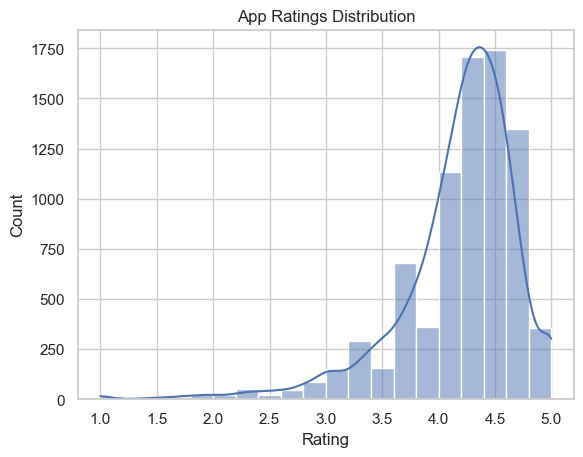

In [24]:
sns.histplot(apps['Rating'], bins=20, kde=True)
plt.title('App Ratings Distribution')
plt.show()


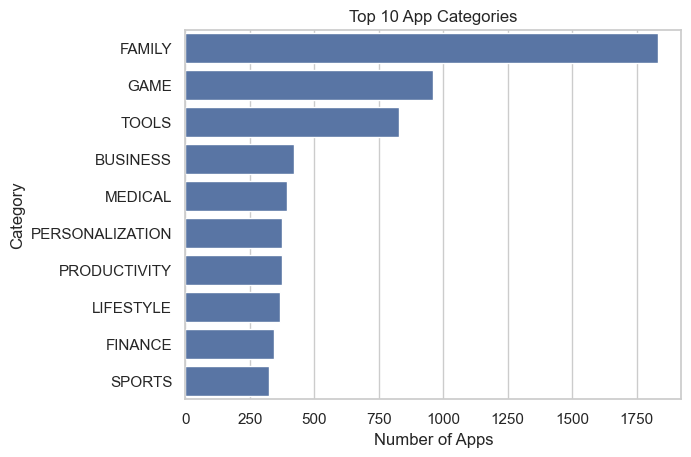

In [25]:
top_cat = apps['Category'].value_counts().head(10)
sns.barplot(x=top_cat.values, y=top_cat.index)
plt.title('Top 10 App Categories')
plt.xlabel('Number of Apps')
plt.show()


<Axes: xlabel='Sentiment', ylabel='count'>

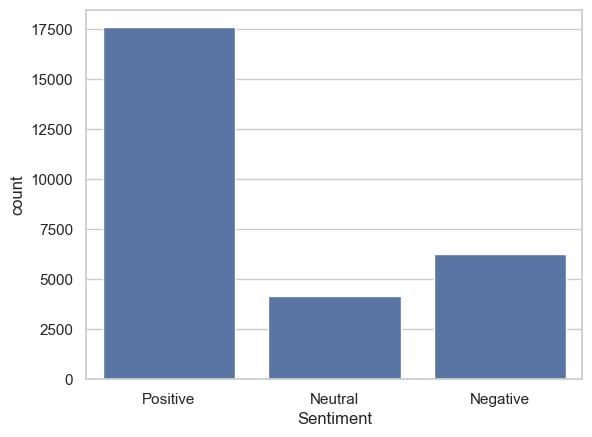

In [29]:
reviews['Sentiment'].value_counts()
sns.countplot(x='Sentiment', data=reviews)


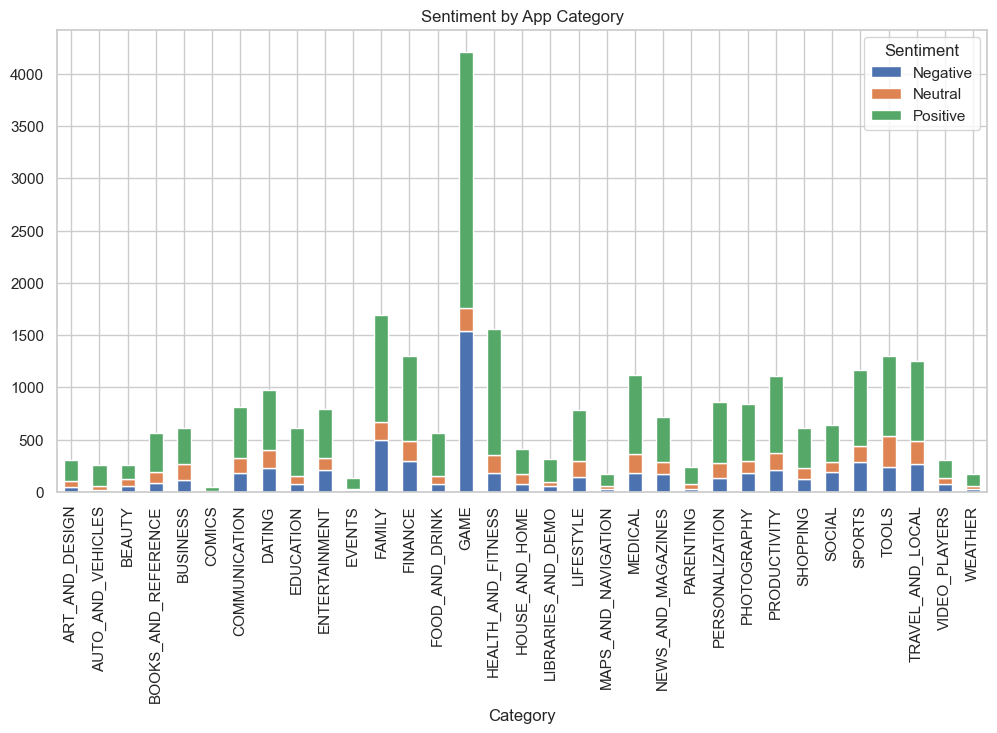

In [30]:
merged.groupby(['Category', 'Sentiment']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Sentiment by App Category')
plt.show()


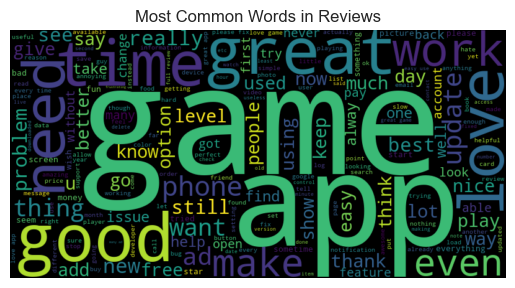

In [31]:
all_reviews = ' '.join(reviews['Translated_Review'].dropna())
wc = WordCloud(width=800, height=400, background_color='black').generate(all_reviews)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()


In [32]:
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')


In [33]:
apps['Price_Range'] = pd.cut(
    apps['Price'], 
    bins=[-1,0,5,20,100,1000], 
    labels=['Free','Low','Medium','High','Very High']
)



In [34]:
apps[['App','Price','Price_Range']].head(10)
apps['Price_Range'].value_counts()


Price_Range
Free         8903
Low           597
Medium        120
Very High      20
High           19
Name: count, dtype: int64

In [35]:
apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')


In [36]:
apps['Rating_Level'] = pd.cut(
    apps['Rating'],
    bins=[0, 3, 4, 4.5, 5],
    labels=['Low', 'Average', 'Good', 'Excellent']
)


In [37]:
apps['Rating_Level'].value_counts()
apps[['App','Rating','Rating_Level']].head(10)


,App,Rating,Rating_Level
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,Good
1,Coloring book moana,3.9,Average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,Excellent
3,Sketch - Draw & Paint,4.5,Good
4,Pixel Draw - Number Art Coloring Book,4.3,Good
5,Paper flowers instructions,4.4,Good
6,Smoke Effect Photo Maker - Smoke Editor,3.8,Average
7,Infinite Painter,4.1,Good
8,Garden Coloring Book,4.4,Good
9,Kids Paint Free - Drawing Fun,4.7,Excellent


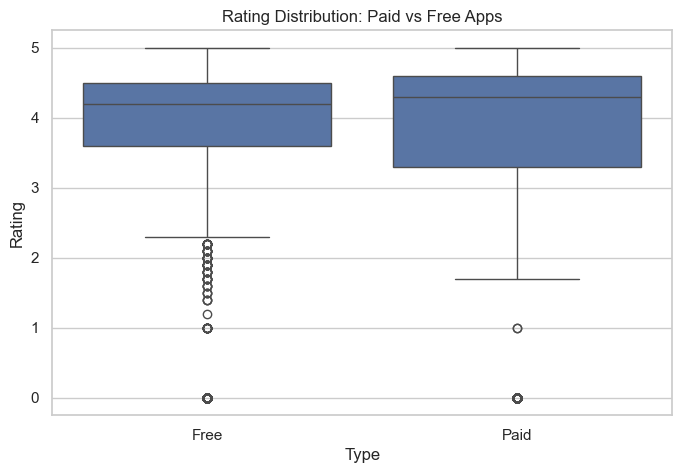

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Rating', data=apps)
plt.title('Rating Distribution: Paid vs Free Apps')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27172\2787612816.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



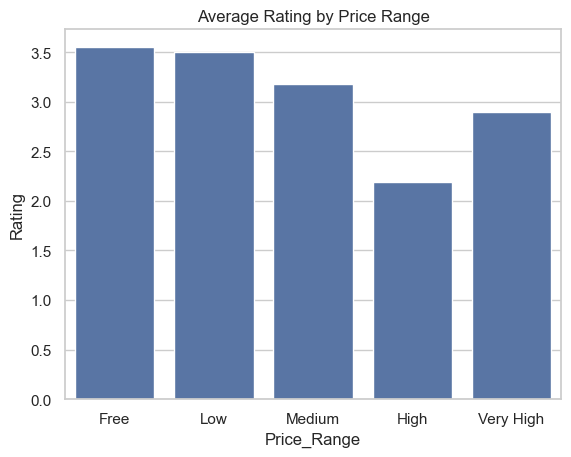

In [39]:
avg_rating_price = apps.groupby('Price_Range')['Rating'].mean().reset_index()
sns.barplot(x='Price_Range', y='Rating', data=avg_rating_price)
plt.title('Average Rating by Price Range')
plt.show()


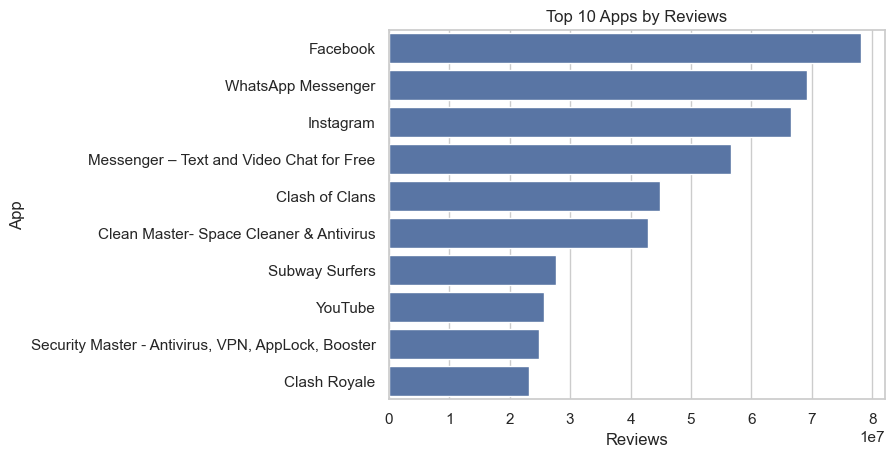

In [40]:
top_apps = apps.sort_values(['Reviews', 'Rating'], ascending=[False, False]).head(10)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Reviews', y='App', data=top_apps)
plt.title('Top 10 Apps by Reviews')
plt.show()


In [41]:
from collections import Counter

positive_words = ' '.join(reviews[reviews['Sentiment']=='Positive']['Translated_Review']).split()
negative_words = ' '.join(reviews[reviews['Sentiment']=='Negative']['Translated_Review']).split()

print("Most common positive words:", Counter(positive_words).most_common(10))
print("Most common negative words:", Counter(negative_words).most_common(10))


Most common positive words: [('i', 16546), ('the', 3157), ('love', 3002), ('great', 2946), ('good', 2927), ('like', 2750), ('it', 2477), ('game', 2474), ('get', 2170), ('this', 2132)]
Most common negative words: [('i', 5969), ('game', 2187), ('the', 1413), ('get', 1035), ('it', 952), ('this', 913), ('like', 873), ('time', 780), ('even', 724), ("can't", 651)]


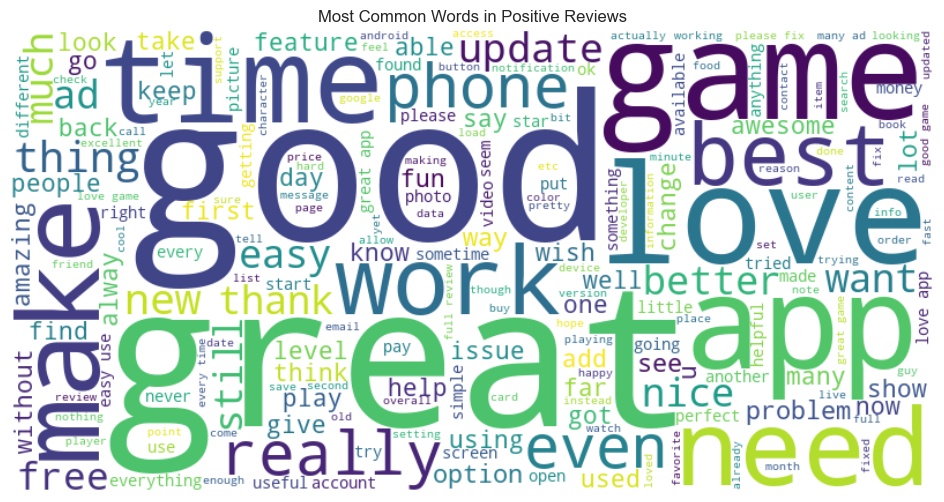

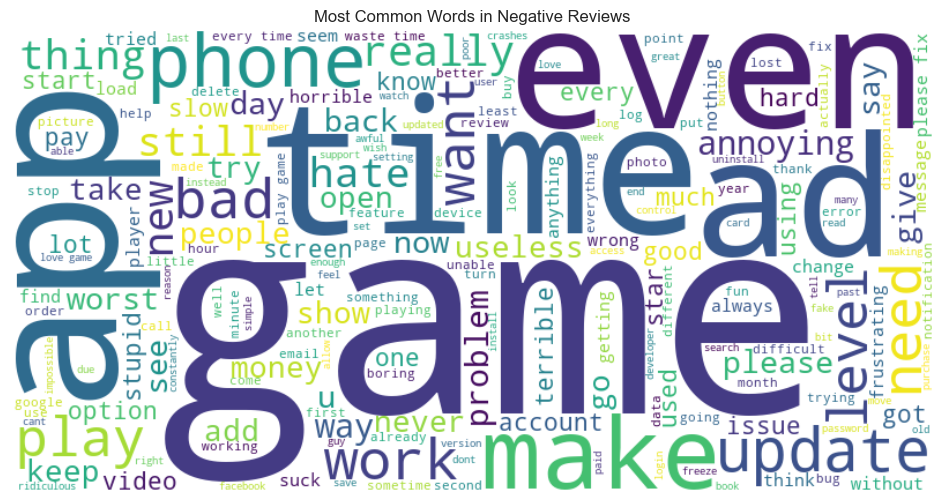

In [42]:
for sentiment in ['Positive','Negative']:
    text = ' '.join(reviews[reviews['Sentiment']==sentiment]['Translated_Review'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {sentiment} Reviews')
    plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27172\1946845182.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




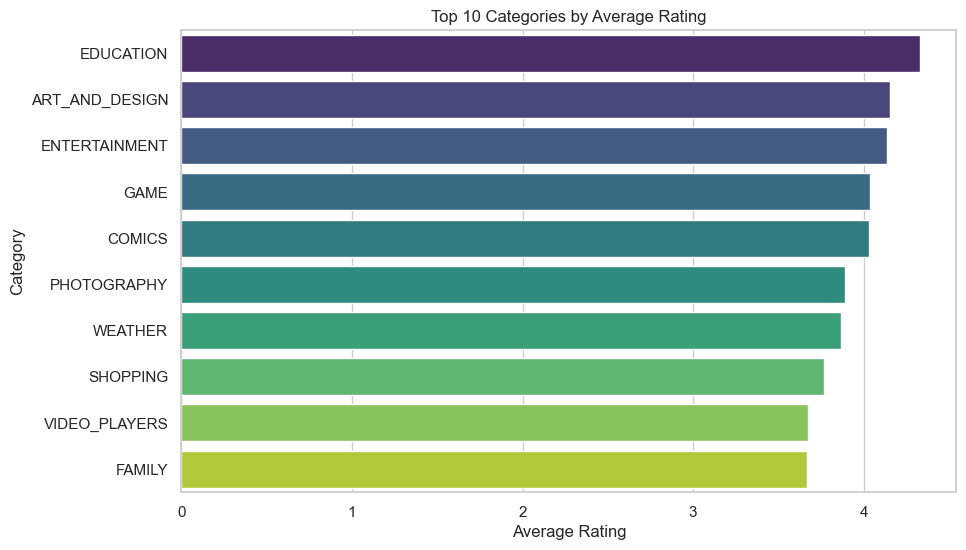

In [43]:
# Step 1: Compute average rating per category
avg_cat = apps.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Step 2: Select top 10
top10_avg_cat = avg_cat.head(10)

# Step 3: Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top10_avg_cat.values, y=top10_avg_cat.index, palette='viridis')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()



In [44]:


# Step 1: Convert to string (so .str.replace works)
apps['Installs'] = apps['Installs'].astype(str)

# Step 2: Remove ',' and '+' signs
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True)

# Step 3: Convert to integer, invalid entries become NaN
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

# Step 4: (Optional) Fill NaN with 0 and convert to int
apps['Installs'] = apps['Installs'].fillna(0).astype(int)


In [45]:
apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')


In [46]:
avg_installs = apps.groupby('Category')['Installs'].mean().sort_values(ascending=False)
top10_installs = avg_installs.head(10)


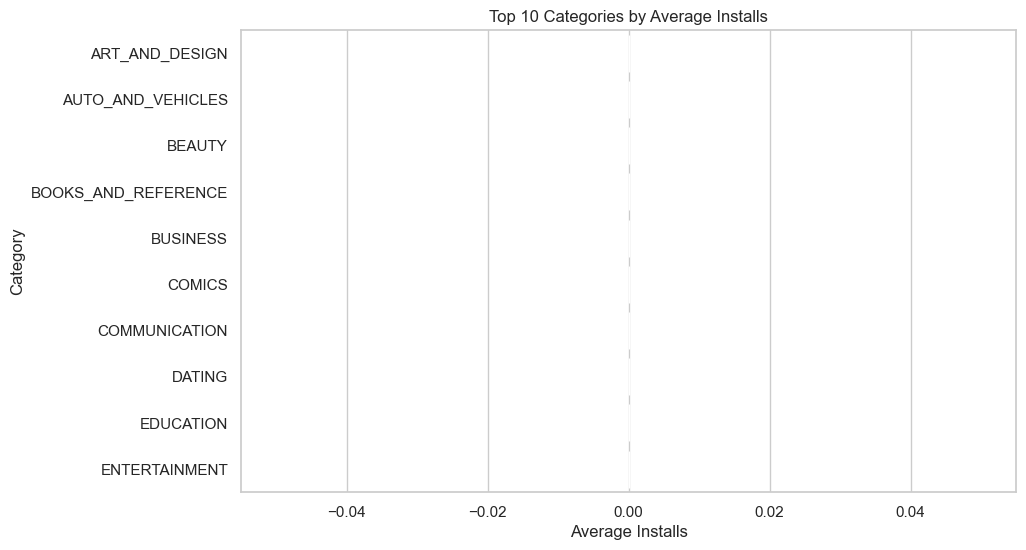

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=top10_installs.values, y=top10_installs.index, color='orange')  # single color
plt.title('Top 10 Categories by Average Installs')
plt.xlabel('Average Installs')
plt.ylabel('Category')
plt.show()

In [48]:
import plotly.express as px

fig = px.scatter(apps, x='Installs', y='Rating', color='Category', hover_data=['App'])
fig.update_layout(title='Interactive Installs vs Rating by Category', xaxis_type='log')
fig.show()


In [49]:
apps.isnull().sum()


Unnamed: 0           0
App                  0
Category             0
Rating               0
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Price_Range          0
Rating_Level      1463
dtype: int64

In [50]:

apps['Rating'] = apps['Rating'].fillna(apps['Rating'].mean())
apps.dropna(subset=['Category', 'App'], inplace=True)


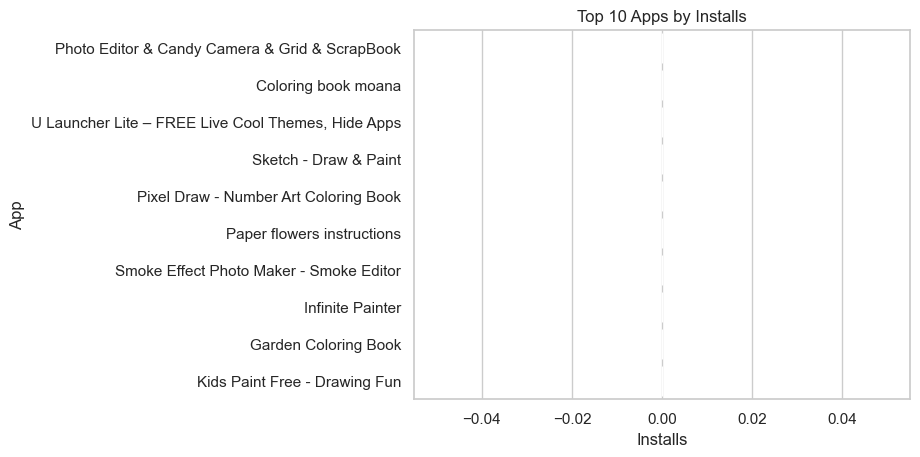

In [51]:
top_installed = apps.sort_values('Installs', ascending=False).head(10)
sns.barplot(x='Installs', y='App', data=top_installed)
plt.title('Top 10 Apps by Installs')
plt.show()



In [52]:
category_summary = apps.groupby('Category')[['Installs', 'Rating', 'Price']].mean().sort_values('Installs', ascending=False)
print(category_summary.head(10))


                     Installs    Rating     Price
Category                                         
ART_AND_DESIGN            0.0  4.153125  0.093281
AUTO_AND_VEHICLES         0.0  3.598824  0.158471
BEAUTY                    0.0  3.390566  0.000000
BOOKS_AND_REFERENCE       0.0  3.307658  0.539505
BUSINESS                  0.0  2.566429  0.417357
COMICS                    0.0  4.032143  0.000000
COMMUNICATION             0.0  3.349524  0.263937
DATING                    0.0  3.111111  0.160468
EDUCATION                 0.0  4.327731  0.150924
ENTERTAINMENT             0.0  4.135294  0.078235


In [53]:
import plotly.express as px

fig = px.scatter(
    apps,
    x='Installs',y='Rating',color='Category',          # hue equivalenthover_data=['App', 'Reviews', 'Price'],  # info shown when hovering
    title='Installs vs Rating by Category',
    log_x=True  # log scale for x-axis
)

fig.show()



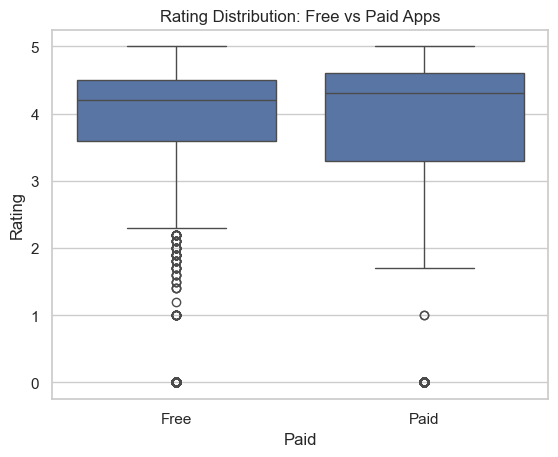

In [54]:
apps['Paid'] = apps['Price'].apply(lambda x: 'Paid' if x > 0 else 'Free')
sns.boxplot(x='Paid', y='Rating', data=apps)
plt.title('Rating Distribution: Free vs Paid Apps')
plt.show()


In [55]:
import plotly.express as px

top_apps = apps.sort_values(['Reviews', 'Rating'], ascending=[False, False]).head(10)

fig = px.bar(
    top_apps,x='Reviews',y='App', color='Rating', orientation='h',
    hover_data=['Category', 'Installs', 'Price'],
    title='Top 10 Apps by Reviews',
    color_continuous_scale='magma'
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


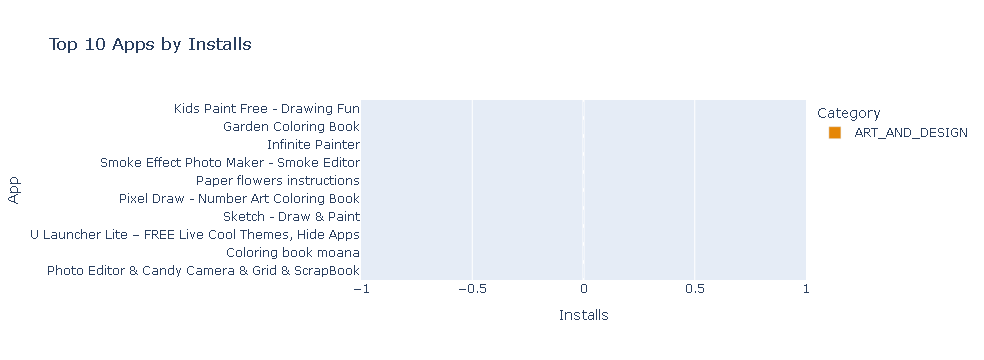

In [56]:
top_installed = apps.sort_values('Installs', ascending=False).head(10)

fig = px.bar(
    top_installed, x='Installs', y='App', color='Category', orientation='h',
    hover_data=['Rating', 'Reviews', 'Price'],
    title='Top 10 Apps by Installs',
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


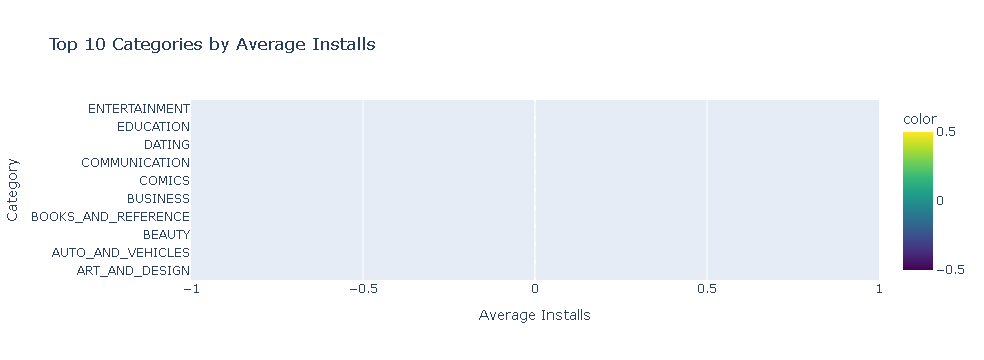

In [58]:
category_installs = apps.groupby('Category')['Installs'].mean().sort_values(ascending=False).head(10)

fig = px.bar(
    x=category_installs.values,y=category_installs.index,orientation='h',
    color=category_installs.values,
    title='Top 10 Categories by Average Installs',
    color_continuous_scale='Viridis'
)

fig.update_layout(
    xaxis_title='Average Installs',
    yaxis_title='Category'
)
fig.show()
